In [1]:
#Data wrangling AAC data-set
import pandas as pd
import numpy as np
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date
import matplotlib.pyplot as plt

In [2]:
aac = pd.read_csv("../Documents/aac_intakes_outcomes.csv", usecols=['outcome_datetime', 'intake_datetime', 'outcome_type', 'animal_type', 'breed', 'date_of_birth'])
aac.head()

,date_of_birth,outcome_type,outcome_datetime,animal_type,breed,intake_datetime
0,2007-07-09 00:00:00,Return to Owner,2017-12-07 14:07:00,Dog,Spinone Italiano Mix,2017-12-07 00:00:00
1,2007-07-09 00:00:00,Return to Owner,2014-12-20 16:35:00,Dog,Spinone Italiano Mix,2014-12-19 10:21:00
2,2007-07-09 00:00:00,Return to Owner,2014-03-08 17:10:00,Dog,Spinone Italiano Mix,2014-03-07 14:26:00
3,2004-04-02 00:00:00,Transfer,2014-04-07 15:12:00,Dog,Dachshund,2014-04-02 15:55:00
4,1997-10-16 00:00:00,Return to Owner,2013-11-16 11:54:00,Dog,Shetland Sheepdog,2013-11-16 09:02:00


In [3]:
aac['outcome_datetime'] = pd.to_datetime(aac['outcome_datetime'])
aac['intake_datetime'] = pd.to_datetime(aac['intake_datetime'])

In [4]:
aac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79672 entries, 0 to 79671
Data columns (total 6 columns):
date_of_birth       79672 non-null object
outcome_type        79662 non-null object
outcome_datetime    79672 non-null datetime64[ns]
animal_type         79672 non-null object
breed               79672 non-null object
intake_datetime     79672 non-null datetime64[ns]
dtypes: datetime64[ns](2), object(4)
memory usage: 3.6+ MB


In [5]:
#created a columne to show length of stay at shelter
aac['shelter_length'] = (aac['outcome_datetime'] - aac['intake_datetime'])
aac.head()

,date_of_birth,outcome_type,outcome_datetime,animal_type,breed,intake_datetime,shelter_length
0,2007-07-09 00:00:00,Return to Owner,2017-12-07 14:07:00,Dog,Spinone Italiano Mix,2017-12-07 00:00:00,0 days 14:07:00
1,2007-07-09 00:00:00,Return to Owner,2014-12-20 16:35:00,Dog,Spinone Italiano Mix,2014-12-19 10:21:00,1 days 06:14:00
2,2007-07-09 00:00:00,Return to Owner,2014-03-08 17:10:00,Dog,Spinone Italiano Mix,2014-03-07 14:26:00,1 days 02:44:00
3,2004-04-02 00:00:00,Transfer,2014-04-07 15:12:00,Dog,Dachshund,2014-04-02 15:55:00,4 days 23:17:00
4,1997-10-16 00:00:00,Return to Owner,2013-11-16 11:54:00,Dog,Shetland Sheepdog,2013-11-16 09:02:00,0 days 02:52:00


In [6]:
#removed return to owner as this implies dog ran away and was sent to shelter as lost dog(null value)
aac = aac[aac.outcome_type != 'Return to Owner']
aac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64881 entries, 3 to 79671
Data columns (total 7 columns):
date_of_birth       64881 non-null object
outcome_type        64871 non-null object
outcome_datetime    64881 non-null datetime64[ns]
animal_type         64881 non-null object
breed               64881 non-null object
intake_datetime     64881 non-null datetime64[ns]
shelter_length      64881 non-null timedelta64[ns]
dtypes: datetime64[ns](2), object(4), timedelta64[ns](1)
memory usage: 4.0+ MB


In [9]:
aac['shelter_length'] = aac['shelter_length'].astype('timedelta64[W]')


In [10]:
aac['shelter_length'] = aac['shelter_length'] / np.timedelta64(1,'W')

In [11]:
#rounded the shelther length column to weeks for comparison but may need to change to month - lowest is 0 and highest is 181
aac.head()

,date_of_birth,outcome_type,outcome_datetime,animal_type,breed,intake_datetime,shelter_length
3,2004-04-02 00:00:00,Transfer,2014-04-07 15:12:00,Dog,Dachshund,2014-04-02 15:55:00,0.0
11,2000-01-21 00:00:00,Transfer,2014-12-22 15:23:00,Cat,American Shorthair Mix,2014-12-08 12:30:00,2.0
12,1997-10-03 00:00:00,Adoption,2013-11-22 09:44:00,Dog,Dachshund Mix,2013-10-03 15:47:00,7.0
13,2000-04-27 00:00:00,Euthanasia,2015-02-17 16:25:00,Dog,Border Collie Mix,2015-02-17 13:17:00,0.0
14,1999-06-01 00:00:00,Adoption,2016-10-07 12:34:00,Dog,Chihuahua Shorthair,2016-09-28 12:05:00,1.0


In [12]:
aac['date_of_birth'] = pd.to_datetime(aac['date_of_birth'])
aac['age_of_outcome'] = (aac['outcome_datetime'] - aac['date_of_birth'])

In [13]:
aac.head()

,date_of_birth,outcome_type,outcome_datetime,animal_type,breed,intake_datetime,shelter_length,age_of_outcome
3,2004-04-02,Transfer,2014-04-07 15:12:00,Dog,Dachshund,2014-04-02 15:55:00,0.0,3657 days 15:12:00
11,2000-01-21,Transfer,2014-12-22 15:23:00,Cat,American Shorthair Mix,2014-12-08 12:30:00,2.0,5449 days 15:23:00
12,1997-10-03,Adoption,2013-11-22 09:44:00,Dog,Dachshund Mix,2013-10-03 15:47:00,7.0,5894 days 09:44:00
13,2000-04-27,Euthanasia,2015-02-17 16:25:00,Dog,Border Collie Mix,2015-02-17 13:17:00,0.0,5409 days 16:25:00
14,1999-06-01,Adoption,2016-10-07 12:34:00,Dog,Chihuahua Shorthair,2016-09-28 12:05:00,1.0,6338 days 12:34:00


In [16]:
#calculating the age of the animal at outcome so that this can be sorted on - calculating based on years
aac['age_of_outcome'] = aac['age_of_outcome'].astype('timedelta64[Y]')

In [17]:
aac['age_of_outcome'] = aac['age_of_outcome'] / np.timedelta64(1,'Y')

In [18]:
aac.head()

,date_of_birth,outcome_type,outcome_datetime,animal_type,breed,intake_datetime,shelter_length,age_of_outcome
3,2004-04-02,Transfer,2014-04-07 15:12:00,Dog,Dachshund,2014-04-02 15:55:00,0.0,10.0
11,2000-01-21,Transfer,2014-12-22 15:23:00,Cat,American Shorthair Mix,2014-12-08 12:30:00,2.0,14.0
12,1997-10-03,Adoption,2013-11-22 09:44:00,Dog,Dachshund Mix,2013-10-03 15:47:00,7.0,16.0
13,2000-04-27,Euthanasia,2015-02-17 16:25:00,Dog,Border Collie Mix,2015-02-17 13:17:00,0.0,14.0
14,1999-06-01,Adoption,2016-10-07 12:34:00,Dog,Chihuahua Shorthair,2016-09-28 12:05:00,1.0,17.0


In [19]:
aac = aac.sort_values(['age_of_outcome'])
aac.head()

,date_of_birth,outcome_type,outcome_datetime,animal_type,breed,intake_datetime,shelter_length,age_of_outcome
66636,2017-07-01,Euthanasia,2017-05-12 16:43:00,Cat,Domestic Shorthair Mix,2017-05-12 15:50:00,0.0,-1.0
35969,2015-07-06,Transfer,2015-07-05 14:46:00,Cat,Domestic Shorthair Mix,2015-07-05 13:25:00,0.0,-1.0
57630,2016-10-28,Transfer,2016-10-04 15:13:00,Cat,Domestic Shorthair Mix,2016-10-04 12:49:00,0.0,-1.0
68511,2014-12-12,Adoption,2014-09-10 17:29:00,Dog,Border Collie Mix,2014-09-09 11:02:00,0.0,-1.0
32209,2015-08-29,Adoption,2015-05-24 17:01:00,Cat,Domestic Shorthair Mix,2015-05-12 12:37:00,1.0,-1.0


In [20]:
#removed ages that are -1 aprox 5 as most likely human error
aac = aac[aac.age_of_outcome != -1.0]
aac.head()


,date_of_birth,outcome_type,outcome_datetime,animal_type,breed,intake_datetime,shelter_length,age_of_outcome
39561,2015-04-06,Transfer,2015-09-21 15:56:00,Cat,Domestic Shorthair Mix,2015-09-12 12:17:00,1.0,0.0
35002,2015-05-20,Adoption,2015-08-25 08:13:00,Cat,Domestic Shorthair Mix,2015-06-20 14:25:00,9.0,0.0
64776,2016-08-03,Adoption,2017-04-10 18:55:00,Cat,Domestic Shorthair Mix,2017-04-03 16:27:00,1.0,0.0
35004,2015-05-05,Adoption,2015-07-01 18:00:00,Cat,Domestic Shorthair Mix,2015-06-20 14:30:00,1.0,0.0
35006,2015-05-11,Died,2015-06-27 08:36:00,Cat,Domestic Shorthair Mix,2015-06-20 14:37:00,0.0,0.0


In [21]:
aac.tail()

,date_of_birth,outcome_type,outcome_datetime,animal_type,breed,intake_datetime,shelter_length,age_of_outcome
68455,1997-06-11,Euthanasia,2017-06-12 11:04:00,Cat,Domestic Shorthair Mix,2017-06-11 11:16:00,0.0,20.0
23051,1994-10-11,Euthanasia,2014-10-11 17:58:00,Cat,Domestic Medium Hair Mix,2014-10-11 17:26:00,0.0,20.0
60535,1996-12-11,Transfer,2016-12-16 00:00:00,Bird,Cockatoo,2016-12-11 14:55:00,0.0,20.0
63649,1995-03-06,Euthanasia,2017-03-06 17:09:00,Cat,Domestic Shorthair Mix,2017-03-06 16:31:00,0.0,22.0
60536,1991-12-11,Transfer,2016-12-16 00:00:00,Bird,Cockatoo,2016-12-11 14:55:00,0.0,25.0


In [22]:
#checking for any null values - see that outcome_type contains some
aac.isna().any()

date_of_birth       False
outcome_type         True
outcome_datetime    False
animal_type         False
breed               False
intake_datetime     False
shelter_length      False
age_of_outcome      False
dtype: bool

In [23]:
#used sort_values to isolate the Nan values
aac['outcome_type'].isna().sort_values().tail(20)

16566    False
16568    False
70554    False
16528    False
16526    False
70584    False
16574    False
60536    False
70572    False
16478    False
59034     True
20020     True
63150     True
71335     True
71341     True
11057     True
9016      True
71339     True
14583     True
44097     True
Name: outcome_type, dtype: bool

In [24]:
aac.loc[11057]

date_of_birth       2014-03-09 00:00:00
outcome_type                        NaN
outcome_datetime    2014-03-09 18:15:00
animal_type                       Other
breed                           Bat Mix
intake_datetime     2014-03-09 16:38:00
shelter_length                        0
age_of_outcome                        0
Name: 11057, dtype: object

In [25]:
#since only 10 entries had Nan values, I decided to drop, especially since entries seemed inconsistent upon reviewing
aac = aac.dropna(subset = ['outcome_type'])

In [26]:
aac.isna().any()

date_of_birth       False
outcome_type        False
outcome_datetime    False
animal_type         False
breed               False
intake_datetime     False
shelter_length      False
age_of_outcome      False
dtype: bool

In [27]:
#noticed that animal type contained Other and Bird, which was not useful to this problem. I excluded them so that data will only reflect Cats and dogs
aac = aac[aac.animal_type != 'Other']
aac = aac[aac.animal_type != 'Bird']
aac.head()

,date_of_birth,outcome_type,outcome_datetime,animal_type,breed,intake_datetime,shelter_length,age_of_outcome
39561,2015-04-06,Transfer,2015-09-21 15:56:00,Cat,Domestic Shorthair Mix,2015-09-12 12:17:00,1.0,0.0
35002,2015-05-20,Adoption,2015-08-25 08:13:00,Cat,Domestic Shorthair Mix,2015-06-20 14:25:00,9.0,0.0
64776,2016-08-03,Adoption,2017-04-10 18:55:00,Cat,Domestic Shorthair Mix,2017-04-03 16:27:00,1.0,0.0
35004,2015-05-05,Adoption,2015-07-01 18:00:00,Cat,Domestic Shorthair Mix,2015-06-20 14:30:00,1.0,0.0
35006,2015-05-11,Died,2015-06-27 08:36:00,Cat,Domestic Shorthair Mix,2015-06-20 14:37:00,0.0,0.0


In [28]:
# data story telling portion
# reviewing the data,  majority of animals were adopted, which is expected. may need to remove additional columns such as 
# disposal and Rto-adopt as not sure that they are relevant for data
aac.groupby(['animal_type', 'outcome_type']).count()

date_of_birth  outcome_datetime  breed  \
animal_type outcome_type                                           
Cat         Adoption              12673             12673  12673   
            Died                    402               402    402   
            Disposal                 13                13     13   
            Euthanasia             1474              1474   1474   
            Missing                  29                29     29   
            Rto-Adopt                36                36     36   
            Transfer              13433             13433  13433   
Dog         Adoption              20580             20580  20580   
            Died                    142               142    142   
            Disposal                 10                10     10   
            Euthanasia             1502              1502   1502   
            Missing                  16                16     16   
            Rto-Adopt               143               143    143   
            Transfer               9697              9697   9697   

                          intake_datetime  shelter_length  age_of_outcome  
animal_type outcome_type                                                   
Cat         Adoption                12673           12673           12673  
            Died                      402             402             402  
            Disposal                   13              13              13  
            Euthanasia               1474            1474            1474  
            Missing                    29              29              29  
            Rto-Adopt                  36              36              36  
            Transfer                13433           13433           13433  
Dog         Adoption                20580           20580           20580  
            Died                      142             142             142  
            Disposal                   10              10              10  
            Euthanasia               1502            1502            1502  
            Missing                    16              16              16  
            Rto-Adopt                 143             143             143  
            Transfer                 9697            9697            9697

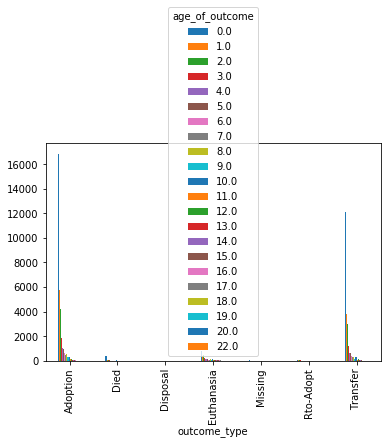

In [50]:
#grouping by outcome type and age of outcome to be able to compare. as expected large amount of animals aged 0-4 were adopted

aac.groupby(['outcome_type','age_of_outcome'])['outcome_type'].count().unstack().plot(kind='bar')
plt.show()


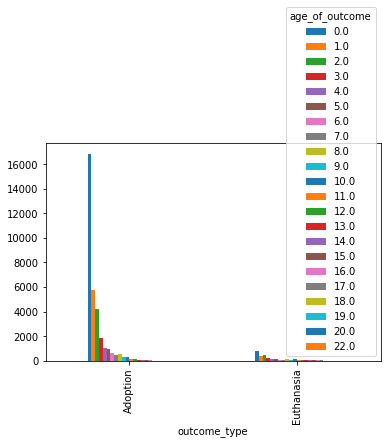

In [30]:
#wanted to review outcome types adoption and euthanasia for ages as seemed relevant options for study
aac2 = aac.set_index(['outcome_type']).loc[['Adoption', 'Euthanasia']]
aac2.reset_index().groupby(['outcome_type','age_of_outcome'])['age_of_outcome'].count().unstack().plot(kind='bar')
#wanted to see the spread of ages for adoptions and euthanasia - euthanasia very low compared to adoptions
#can clearly see a trend with adoptions - the lower the age, the higher the chance of adoption, harder to see a trend with euthanasia 

Text(0.5, 0, 'Euthanasia by age')

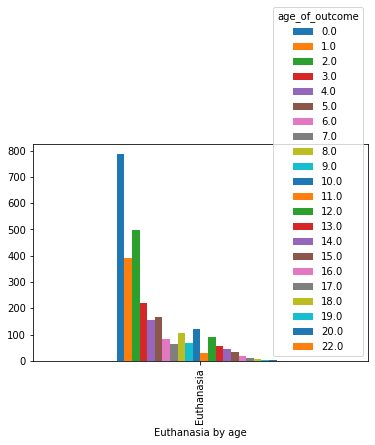

In [47]:
#isolated just the euthanasias to see the distribution of ages
aac3 = aac.set_index(['outcome_type']).loc['Euthanasia']
aac3.reset_index().groupby(['outcome_type','age_of_outcome'])['age_of_outcome'].count().unstack().plot(kind='bar')
plt.xlabel('Euthanasia by age')
#we can see by just reviewing the euthanasia graph that the highest animals euthanized were 0-5 years, which is not what I expected
#perhaps this is due to illness - would be interesting to compare teo shelter length

In [32]:
aac3.reset_index().groupby(['outcome_type','age_of_outcome'])['age_of_outcome'].count()


outcome_type  age_of_outcome
Euthanasia    0.0               787
              1.0               393
              2.0               497
              3.0               220
              4.0               155
              5.0               169
              6.0                84
              7.0                66
              8.0               108
              9.0                67
              10.0              123
              11.0               30
              12.0               93
              13.0               58
              14.0               44
              15.0               34
              16.0               19
              17.0               13
              18.0                6
              19.0                4
              20.0                5
              22.0                1
Name: age_of_outcome, dtype: int64

Text(0.5, 0, 'Euthanasia and shelter length')

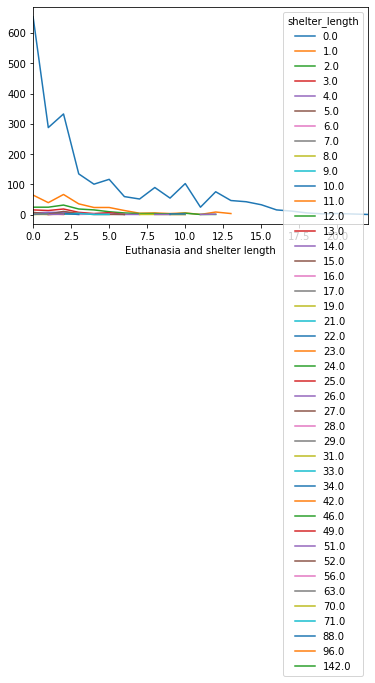

In [46]:
# you can see that the majority of euthanized animals were in the shelter less than 1 year, leading me to think illness/ disease
aac3.reset_index().groupby(['age_of_outcome', 'shelter_length'])['outcome_type'].count().unstack().plot()
plt.xlabel('Euthanasia and shelter length')

Text(0, 0.5, 'age')

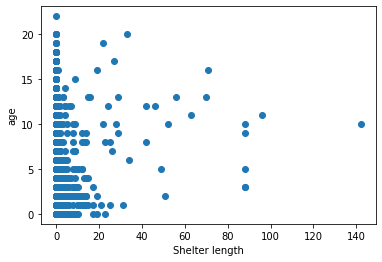

In [34]:
#you can see that the youngest animals euthanized also have the shortest time at the shelter on average
plt.scatter(aac3.shelter_length, aac3.age_of_outcome)
plt.xlabel('Shelter length')
plt.ylabel('age')

In [35]:
#I wanted to investigate the highest amount of animals being euthanized to see if there was any distinctions
#Almost 500 were cats under 1 year - I think there is more to this than just illness, perhaps this is how the 
#shelther deals with large volumes? also interesting is that pit bulls account for 125 of dogs 2 years. interesting 
# this could be due to the breed specifically 
aac3.groupby(['breed', 'age_of_outcome']).count().sort_values(['date_of_birth']).tail()


date_of_birth  outcome_datetime  \
breed                  age_of_outcome                                    
Pit Bull Mix           1.0                        75                75   
                       2.0                       125               125   
Domestic Shorthair Mix 2.0                       145               145   
                       1.0                       161               161   
                       0.0                       487               487   

                                       animal_type  intake_datetime  \
breed                  age_of_outcome                                 
Pit Bull Mix           1.0                      75               75   
                       2.0                     125              125   
Domestic Shorthair Mix 2.0                     145              145   
                       1.0                     161              161   
                       0.0                     487              487   

                                       shelter_length  
breed                  age_of_outcome                  
Pit Bull Mix           1.0                         75  
                       2.0                        125  
Domestic Shorthair Mix 2.0                        145  
                       1.0                        161  
                       0.0                        487

In [36]:
#wanted to do the same comparison for adoptions - can see that interestingly the cat below 1 accounts for 7500 adoptions
#perhaps the ones euthanized are due to illness as around 6%. You can see that Labrador leads for dogs as does chihuaha
#can clearly see cats take up a lare portion of adoptions
aac4 = aac.set_index(['outcome_type']).loc['Adoption']
aac4.reset_index().groupby(['breed', 'age_of_outcome']).count().sort_values(['date_of_birth']).tail(10)

outcome_type  date_of_birth  \
breed                    age_of_outcome                                
Domestic Shorthair Mix   2.0                      471            471   
Chihuahua Shorthair Mix  1.0                      557            557   
Pit Bull Mix             2.0                      578            578   
                         0.0                      611            611   
                         1.0                      634            634   
Chihuahua Shorthair Mix  0.0                      638            638   
Domestic Shorthair Mix   1.0                      776            776   
Domestic Medium Hair Mix 0.0                      802            802   
Labrador Retriever Mix   0.0                     1274           1274   
Domestic Shorthair Mix   0.0                     7523           7523   

                                         outcome_datetime  animal_type  \
breed                    age_of_outcome                                  
Domestic Shorthair Mix   2.0                          471          471   
Chihuahua Shorthair Mix  1.0                          557          557   
Pit Bull Mix             2.0                          578          578   
                         0.0                          611          611   
                         1.0                          634          634   
Chihuahua Shorthair Mix  0.0                          638          638   
Domestic Shorthair Mix   1.0                          776          776   
Domestic Medium Hair Mix 0.0                          802          802   
Labrador Retriever Mix   0.0                         1274         1274   
Domestic Shorthair Mix   0.0                         7523         7523   

                                         intake_datetime  shelter_length  
breed                    age_of_outcome                                   
Domestic Shorthair Mix   2.0                         471             471  
Chihuahua Shorthair Mix  1.0                         557             557  
Pit Bull Mix             2.0                         578             578  
                         0.0                         611             611  
                         1.0                         634             634  
Chihuahua Shorthair Mix  0.0                         638             638  
Domestic Shorthair Mix   1.0                         776             776  
Domestic Medium Hair Mix 0.0                         802             802  
Labrador Retriever Mix   0.0                        1274            1274  
Domestic Shorthair Mix   0.0                        7523            7523

In [38]:
aac2.groupby(['animal_type', 'breed']).count().tail()

date_of_birth  \
animal_type breed                                                          
Dog         Yorkshire Terrier/Pomeranian                               2   
            Yorkshire Terrier/Rat Terrier                              5   
            Yorkshire Terrier/Shih Tzu                                 2   
            Yorkshire Terrier/Soft Coated Wheaten Terrier              1   
            Yorkshire Terrier/Yorkshire Terrier                        1   

                                                           outcome_datetime  \
animal_type breed                                                             
Dog         Yorkshire Terrier/Pomeranian                                  2   
            Yorkshire Terrier/Rat Terrier                                 5   
            Yorkshire Terrier/Shih Tzu                                    2   
            Yorkshire Terrier/Soft Coated Wheaten Terrier                 1   
            Yorkshire Terrier/Yorkshire Terrier                           1   

                                                           intake_datetime  \
animal_type breed                                                            
Dog         Yorkshire Terrier/Pomeranian                                 2   
            Yorkshire Terrier/Rat Terrier                                5   
            Yorkshire Terrier/Shih Tzu                                   2   
            Yorkshire Terrier/Soft Coated Wheaten Terrier                1   
            Yorkshire Terrier/Yorkshire Terrier                          1   

                                                           shelter_length  \
animal_type breed                                                           
Dog         Yorkshire Terrier/Pomeranian                                2   
            Yorkshire Terrier/Rat Terrier                               5   
            Yorkshire Terrier/Shih Tzu                                  2   
            Yorkshire Terrier/Soft Coated Wheaten Terrier               1   
            Yorkshire Terrier/Yorkshire Terrier                         1   

                                                           age_of_outcome  
animal_type breed                                                          
Dog         Yorkshire Terrier/Pomeranian                                2  
            Yorkshire Terrier/Rat Terrier                               5  
            Yorkshire Terrier/Shih Tzu                                  2  
            Yorkshire Terrier/Soft Coated Wheaten Terrier               1  
            Yorkshire Terrier/Yorkshire Terrier                         1

In [39]:
aac2.groupby(['animal_type']).count()

,date_of_birth,outcome_datetime,breed,intake_datetime,shelter_length,age_of_outcome
animal_type,,,,,,
Cat,14147,14147,14147,14147,14147,14147
Dog,22082,22082,22082,22082,22082,22082


In [40]:
#after realizing that the cat breeds are throwing off the data, I am
#going to remove cats and review breeds of dogs solely
aac5 = aac3.set_index(['animal_type']).loc['Dog']
aac5.reset_index().groupby(['breed', 'age_of_outcome']).count().sort_values(['date_of_birth']).tail(10)
#this data now shows top dog breeds euhanized by age and breed
#we see pit bull leads the charts

animal_type  date_of_birth  \
breed                   age_of_outcome                               
Chihuahua Shorthair Mix 1.0                      22             22   
Labrador Retriever Mix  0.0                      23             23   
Chihuahua Shorthair Mix 2.0                      28             28   
Pit Bull Mix            5.0                      31             31   
                        4.0                      33             33   
Chihuahua Shorthair Mix 0.0                      33             33   
Pit Bull Mix            0.0                      41             41   
                        3.0                      62             62   
                        1.0                      75             75   
                        2.0                     125            125   

                                        outcome_datetime  intake_datetime  \
breed                   age_of_outcome                                      
Chihuahua Shorthair Mix 1.0                           22               22   
Labrador Retriever Mix  0.0                           23               23   
Chihuahua Shorthair Mix 2.0                           28               28   
Pit Bull Mix            5.0                           31               31   
                        4.0                           33               33   
Chihuahua Shorthair Mix 0.0                           33               33   
Pit Bull Mix            0.0                           41               41   
                        3.0                           62               62   
                        1.0                           75               75   
                        2.0                          125              125   

                                        shelter_length  
breed                   age_of_outcome                  
Chihuahua Shorthair Mix 1.0                         22  
Labrador Retriever Mix  0.0                         23  
Chihuahua Shorthair Mix 2.0                         28  
Pit Bull Mix            5.0                         31  
                        4.0                         33  
Chihuahua Shorthair Mix 0.0                         33  
Pit Bull Mix            0.0                         41  
                        3.0                         62  
                        1.0                         75  
                        2.0                        125

Text(0.5, 0, 'Top Dog Euthanasia')

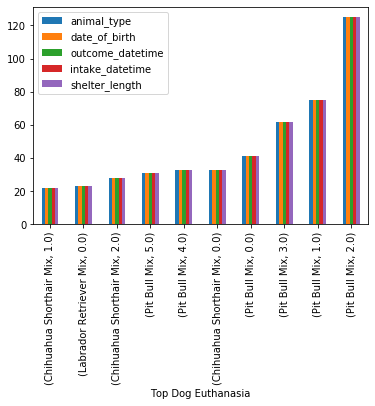

In [44]:
aac5.reset_index().groupby(['breed', 'age_of_outcome']).count().sort_values(['date_of_birth']).tail(10).plot(kind='bar')
plt.xlabel('Top Dog Euthanasia')

In [42]:
#now lets compare the adoptions to see which breeds lead that category
aac6 = aac4.set_index(['animal_type']).loc['Dog']
aac6.reset_index().groupby(['breed', 'age_of_outcome']).count().sort_values(['date_of_birth']).tail(10)

animal_type  date_of_birth  \
breed                     age_of_outcome                               
Australian Cattle Dog Mix 0.0                     281            281   
German Shepherd Mix       0.0                     349            349   
Chihuahua Shorthair Mix   2.0                     434            434   
Labrador Retriever Mix    1.0                     442            442   
Chihuahua Shorthair Mix   1.0                     557            557   
Pit Bull Mix              2.0                     578            578   
                          0.0                     611            611   
                          1.0                     634            634   
Chihuahua Shorthair Mix   0.0                     638            638   
Labrador Retriever Mix    0.0                    1274           1274   

                                          outcome_datetime  intake_datetime  \
breed                     age_of_outcome                                      
Australian Cattle Dog Mix 0.0                          281              281   
German Shepherd Mix       0.0                          349              349   
Chihuahua Shorthair Mix   2.0                          434              434   
Labrador Retriever Mix    1.0                          442              442   
Chihuahua Shorthair Mix   1.0                          557              557   
Pit Bull Mix              2.0                          578              578   
                          0.0                          611              611   
                          1.0                          634              634   
Chihuahua Shorthair Mix   0.0                          638              638   
Labrador Retriever Mix    0.0                         1274             1274   

                                          shelter_length  
breed                     age_of_outcome                  
Australian Cattle Dog Mix 0.0                        281  
German Shepherd Mix       0.0                        349  
Chihuahua Shorthair Mix   2.0                        434  
Labrador Retriever Mix    1.0                        442  
Chihuahua Shorthair Mix   1.0                        557  
Pit Bull Mix              2.0                        578  
                          0.0                        611  
                          1.0                        634  
Chihuahua Shorthair Mix   0.0                        638  
Labrador Retriever Mix    0.0                       1274

Text(0.5, 0, 'Top Dog Adoptions')

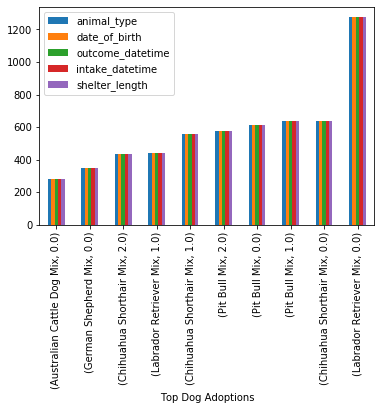

In [43]:
aac6.reset_index().groupby(['breed', 'age_of_outcome']).count().sort_values(['date_of_birth']).tail(10).plot(kind='bar')
plt.xlabel('Top Dog Adoptions')